# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='int32')

Plot the training data

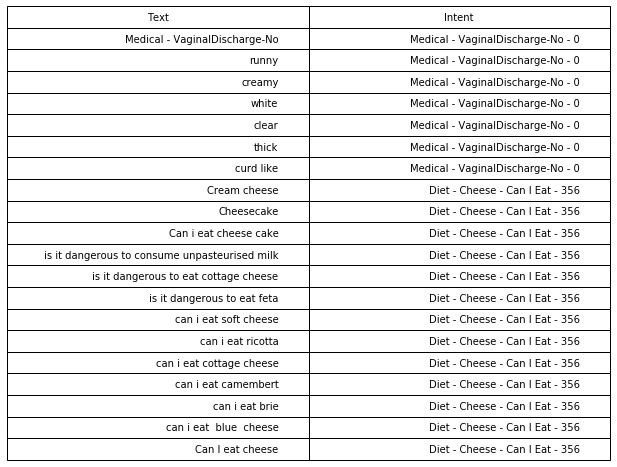

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.4.1'

Start training the classification model and save

In [8]:
import torch.optim as optim
from text_classification.sif_starspace.model import StarspaceClassifierWrapper
from text_classification.sif_starspace.train import StarspaceClassifierLearner
from common.callbacks import PrintLoggerCallback, EarlyStoppingCallback

model = StarspaceClassifierWrapper({'num_classes': num_classes})
# learner = StarspaceClassifierLearner(model, 
#     optimizer_fn=optim.SGD, 
#     optimizer_kwargs={'lr': 0.01, 'momentum': 0.9}
# )
learner = StarspaceClassifierLearner(model)

In [9]:
learner.fit(
    training_data=(X_train, y_train),
    batch_size=64,
    epochs=300,
    callbacks=[
        PrintLoggerCallback(log_every=1),
        EarlyStoppingCallback(tolerance=0)
    ]
)

0m 38s (- 189m 32s) (1 0%) - loss: 949.3469 - accuracy: 0.0244
1m 13s (- 181m 46s) (2 0%) - loss: 831.8445 - accuracy: 0.1246
1m 48s (- 178m 43s) (3 1%) - loss: 767.6548 - accuracy: 0.2094
2m 25s (- 179m 42s) (4 1%) - loss: 721.2721 - accuracy: 0.2657
3m 0s (- 177m 39s) (5 1%) - loss: 686.3074 - accuracy: 0.3013
3m 36s (- 176m 44s) (6 2%) - loss: 654.8327 - accuracy: 0.3231
4m 12s (- 176m 4s) (7 2%) - loss: 628.3760 - accuracy: 0.3401
4m 47s (- 174m 51s) (8 2%) - loss: 602.4545 - accuracy: 0.3527
5m 23s (- 174m 35s) (9 3%) - loss: 577.1238 - accuracy: 0.3614
5m 59s (- 173m 53s) (10 3%) - loss: 553.7411 - accuracy: 0.3685
6m 50s (- 179m 51s) (11 3%) - loss: 535.2055 - accuracy: 0.3754
7m 26s (- 178m 44s) (12 4%) - loss: 514.1495 - accuracy: 0.3857
8m 1s (- 177m 2s) (13 4%) - loss: 495.5931 - accuracy: 0.3864
8m 34s (- 175m 19s) (14 4%) - loss: 478.4410 - accuracy: 0.3942
9m 9s (- 174m 5s) (15 5%) - loss: 463.3401 - accuracy: 0.3998
9m 44s (- 172m 47s) (16 5%) - loss: 448.5570 - accuracy

73m 58s (- 100m 45s) (127 42%) - loss: 127.1365 - accuracy: 0.7147
74m 33s (- 100m 10s) (128 42%) - loss: 125.1190 - accuracy: 0.7230
75m 9s (- 99m 37s) (129 43%) - loss: 126.0060 - accuracy: 0.7198
75m 43s (- 99m 1s) (130 43%) - loss: 124.6942 - accuracy: 0.7225
76m 18s (- 98m 26s) (131 43%) - loss: 123.6052 - accuracy: 0.7279
76m 54s (- 97m 53s) (132 44%) - loss: 125.1146 - accuracy: 0.7290
77m 28s (- 97m 16s) (133 44%) - loss: 122.3104 - accuracy: 0.7234
78m 2s (- 96m 41s) (134 44%) - loss: 121.7499 - accuracy: 0.7282
78m 37s (- 96m 5s) (135 45%) - loss: 122.7017 - accuracy: 0.7230
79m 13s (- 95m 32s) (136 45%) - loss: 121.6319 - accuracy: 0.7214
79m 48s (- 94m 57s) (137 45%) - loss: 120.8380 - accuracy: 0.7252
80m 24s (- 94m 23s) (138 46%) - loss: 119.8548 - accuracy: 0.7234
80m 59s (- 93m 48s) (139 46%) - loss: 118.7108 - accuracy: 0.7253
81m 35s (- 93m 15s) (140 46%) - loss: 119.5576 - accuracy: 0.7253
82m 10s (- 92m 39s) (141 47%) - loss: 118.4164 - accuracy: 0.7250
82m 44s (- 9

In [10]:
torch.topk(model(['I\'m having diahrea']), 50)

(tensor([[0.4973, 0.4931, 0.4725, 0.4589, 0.4394, 0.4302, 0.4296, 0.4132, 0.3859,
          0.3830, 0.3767, 0.3724, 0.3718, 0.3686, 0.3656, 0.3619, 0.3493, 0.3223,
          0.3174, 0.3170, 0.3168, 0.3149, 0.3129, 0.3128, 0.3096, 0.3096, 0.3051,
          0.3031, 0.2928, 0.2856, 0.2855, 0.2845, 0.2741, 0.2714, 0.2709, 0.2704,
          0.2637, 0.2622, 0.2620, 0.2549, 0.2543, 0.2542, 0.2536, 0.2530, 0.2514,
          0.2439, 0.2439, 0.2401, 0.2390, 0.2378]]),
 tensor([[1251,  759,  210, 1018, 1031, 1242,  161, 1186,  279,  313,  599,  848,
           172, 1165,  899, 1340,  922,  541,  468,   81, 1266,   16,  585, 1117,
            12, 1304,  598, 1352, 1119,  907,  159, 1283,   35, 1374,  473,  613,
           217,  302, 1384,  248,  520,  914, 1421, 1096,  794,  954,  550,  381,
           344,  342]]))

In [11]:
torch.topk(model(['the earth is flat']), 50)

(tensor([[0.3583, 0.3386, 0.3266, 0.3253, 0.3099, 0.3027, 0.3019, 0.2877, 0.2851,
          0.2803, 0.2767, 0.2703, 0.2664, 0.2652, 0.2537, 0.2485, 0.2473, 0.2471,
          0.2468, 0.2441, 0.2428, 0.2401, 0.2389, 0.2380, 0.2372, 0.2348, 0.2323,
          0.2315, 0.2271, 0.2267, 0.2256, 0.2250, 0.2216, 0.2142, 0.2127, 0.2121,
          0.2120, 0.2088, 0.2061, 0.2038, 0.2035, 0.2034, 0.2031, 0.2005, 0.1979,
          0.1974, 0.1895, 0.1892, 0.1888, 0.1882]]),
 tensor([[ 758, 1389, 1048,  556,  606,  839,  298, 1115,  981,  527,  773,  752,
           746,  279,  622,  594,  315,   35,  577,  848, 1186, 1392,  794,   52,
           813, 1370, 1264,  602,  616,  854,  849,  967,  143, 1295, 1252,  409,
           780,  366,  669,  511,  654, 1031,  684,  126,  146, 1157,   23, 1171,
           230,  916]]))

In [13]:
classes[1251]

'BabyGender - Happy'